# Individual Project

## Data Analysis and Management of an Online gaming platform

---

### 📚 Methodology and Procedure

This project will be desugned and delivered following the standard and guidelines provided below:

1. **Design and implementation** - The datasets will be extracted, loaded and transformed using the ETL pipeline guidelines
2. **Descriptive Analysis** - initial descriptive analysis would be carried out to understand the transformed data
3. **Data Visualisation** - visualisng the data using Matplotlib, seasborn and plotly
4. **Correlation Analysis** - Understand the correlation between different features
5. **Machine Learning Algorithm** - We would employ feature engineering and classification. 

### 📊 Dataset Overview

We'll be working with a **online gaming datasets: Ads, user and in game purchase** containing 2 different data: Ad and in game purchase with different features.




## Environment Setup and Data Loading

### Installing and Importing Required Libraries

In [1]:
# Standard library imports
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical functions
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Matplotlib settings for better display
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# Seaborn settings
sns.set_style('whitegrid')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [2]:
# Load the dataset
df = pd.read_csv('ad-clicks.csv')
df1 = pd.read_csv('buy-clicks.csv')
df2 = pd.read_csv('users.csv')

# Display basic information
print("📊 Ads Dataset Shape:", df.shape)
print("📊 In-game Purchase Dataset Shape:", df1.shape)
print("📊 Users Dataset Shape:", df2.shape)
print("\n📋 Column Names and Types of the Ad data:")
print(df.dtypes)
print("\n📋 Column Names and Types of the In game Purchase data:")
print(df1.dtypes)
print("\n📋 Column Names and Types of the users data:")
print(df2.dtypes)

📊 Ads Dataset Shape: (16323, 7)
📊 In-game Purchase Dataset Shape: (2947, 7)
📊 Users Dataset Shape: (2393, 6)

📋 Column Names and Types of the Ad data:
timestamp        object
txId              int64
userSessionId     int64
teamId            int64
userId            int64
adId              int64
adCategory       object
dtype: object

📋 Column Names and Types of the In game Purchase data:
timestamp         object
txId               int64
userSessionId      int64
team               int64
userId             int64
buyId              int64
price            float64
dtype: object

📋 Column Names and Types of the users data:
timestamp    object
userId        int64
nick         object
twitter      object
dob          object
country      object
dtype: object


# Data Preprocessing

In [3]:
df.head()

timestamp  txId  userSessionId  teamId  userId  adId   adCategory
0  2016-05-26 15:13:22  5974           5809      27     611     2  electronics
1  2016-05-26 15:17:24  5976           5705      18    1874    21       movies
2  2016-05-26 15:22:52  5978           5791      53    2139    25    computers
3  2016-05-26 15:22:57  5973           5756      63     212    10      fashion
4  2016-05-26 15:22:58  5980           5920       9    1027    20     clothing

## Understanding the column/feature
 - timestamp - when the click on the advert occured
 - txId - the unique ID generated for the click
 - userSessionId - the id of the session of the user who made the click
 - teamId - the current team the user belongs to when they made the click
 - userId - the unqiue id for the user 
 - adId - the unique ID for the advert clicked 
 - adCategory - the type or category of advert clicked on

In [4]:
#Checking for missing values in the advert dataset
df.isnull().sum()

timestamp        0
txId             0
userSessionId    0
teamId           0
userId           0
adId             0
adCategory       0
dtype: int64

In [39]:
df.describe()

txId  userSessionId        teamId        userId          adId
count  16323.000000   16323.000000  16323.000000  16323.000000  16323.000000
mean   24613.829259   22090.773449     70.294921   1187.464192     14.654046
std     9513.244787    8780.273065     39.631995    691.561945      8.623599
min     5972.000000    5649.000000      2.000000      1.000000      0.000000
25%    16994.500000   15880.000000     35.000000    564.000000      7.000000
50%    25111.000000   21017.000000     69.000000   1161.000000     15.000000
75%    32597.500000   27912.000000     99.000000   1771.000000     22.000000
max    39833.000000   39623.000000    179.000000   2387.000000     29.000000

In [10]:
df1.head()

timestamp  txId  userSessionId  team  userId  buyId  price
0  2016-05-26 15:36:54  6004           5820     9    1300      2    3.0
1  2016-05-26 15:36:54  6005           5775    35     868      4   10.0
2  2016-05-26 15:36:54  6006           5679    97     819      5   20.0
3  2016-05-26 16:36:54  6067           5665    18     121      2    3.0
4  2016-05-26 17:06:54  6093           5709    11    2222      5   20.0

## Understanding the column/feature
 - timestamp - when the purchase was made
 - txId - a unique for the purchase
 - userSessionId - an ID for the user session when the purchase was made
 - team - current team ID for the user who made the purchase 
 - userId - the user ID of the player who made the purchase
 - buyId - the unique ID of the item purchase
 - price - the price of the item purchased

In [18]:
#Checking for missing values in the in game purchase dataset
df1.isnull().sum()

timestamp        0
txId             0
userSessionId    0
team             0
userId           0
buyId            0
price            0
dtype: int64

In [21]:
df1.describe()

txId  userSessionId         team       userId        buyId  \
count   2947.000000    2947.000000  2947.000000  2947.000000  2947.000000   
mean   25443.010859   22884.752290    70.318968  1187.459111     2.530709   
std     9343.543793    8669.353627    40.274525   685.703809     1.779987   
min     6004.000000    5652.000000     2.000000     1.000000     0.000000   
25%    17991.500000   16001.000000    35.000000   590.000000     1.000000   
50%    26138.000000   23429.000000    69.000000  1190.000000     2.000000   
75%    33294.500000   29165.000000    99.000000  1759.000000     4.000000   
max    39842.000000   39275.000000   178.000000  2387.000000     5.000000   

             price  
count  2947.000000  
mean      7.263997  
std       7.076313  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%      10.000000  
max      20.000000

In [5]:
# Categorise the price column into spenders
df1['Spender'] = pd.cut(df1['price'], 
                               bins=[0, 5, 10, 20],
                               labels=['Low_Spender', 'Average_Spender', 'Heavy_Spender'])
df1.head()

timestamp  txId  userSessionId  team  userId  buyId  price  \
0  2016-05-26 15:36:54  6004           5820     9    1300      2    3.0   
1  2016-05-26 15:36:54  6005           5775    35     868      4   10.0   
2  2016-05-26 15:36:54  6006           5679    97     819      5   20.0   
3  2016-05-26 16:36:54  6067           5665    18     121      2    3.0   
4  2016-05-26 17:06:54  6093           5709    11    2222      5   20.0   

           Spender  
0      Low_Spender  
1  Average_Spender  
2    Heavy_Spender  
3      Low_Spender  
4    Heavy_Spender

In [36]:
df2.head()

timestamp  userId         nick   twitter         dob country
0  2012-06-19 14:53:41     442     pcjIOBKW  @SZhyOHv  1994-07-20      BA
1  2012-06-19 19:29:01     949      vAOfUkf    @nkkNo  1971-04-22      HU
2  2012-06-20 19:34:59    1654       qOOXSQ    @SwOlw  1970-04-19      IS
3  2012-06-21 01:18:29    1586      px4gW51  @IrCHTnE  1965-11-23      AM
4  2012-06-21 15:35:00     599  9gkfwRC73Uc   @VJj0Az  1994-08-23      CC

## Understanding the column/feature
 - timestamp - The time the user first played the game
 - userId - The unqiue ID assigned to the user when they joined the game
 - nick - The nickname chosen by the user
 - twitter - The twitter handle of the user *--this column will be dropped due to GDPR*
 - dob - The date of birth of the user *--this will be transformed to answer the objective of age demography*
 - country - The country code where the user is playing the game

In [19]:
#Checking for missing values in the user dataset
df2.isnull().sum()

timestamp     0
userId        0
nick          0
twitter       0
dob           0
country      10
dtype: int64

In [6]:
# Dropping the 'twitter' column to meet GDPR guideline
df2.drop('twitter', axis=1, inplace=True)
df2.head()

timestamp  userId         nick         dob country
0  2012-06-19 14:53:41     442     pcjIOBKW  1994-07-20      BA
1  2012-06-19 19:29:01     949      vAOfUkf  1971-04-22      HU
2  2012-06-20 19:34:59    1654       qOOXSQ  1970-04-19      IS
3  2012-06-21 01:18:29    1586      px4gW51  1965-11-23      AM
4  2012-06-21 15:35:00     599  9gkfwRC73Uc  1994-08-23      CC

In [7]:
# transforming the 'dob' column intp birth_year and birth_month
df2['dob'] = pd.to_datetime(df2['dob'])
df2['birth_year'] = df2['dob'].dt.year
df2['birth_month'] = df2['dob'].dt.month_name()
df2.drop('dob', axis=1, inplace=True)
df2.head()

timestamp  userId         nick country  birth_year birth_month
0  2012-06-19 14:53:41     442     pcjIOBKW      BA        1994        July
1  2012-06-19 19:29:01     949      vAOfUkf      HU        1971       April
2  2012-06-20 19:34:59    1654       qOOXSQ      IS        1970       April
3  2012-06-21 01:18:29    1586      px4gW51      AM        1965    November
4  2012-06-21 15:35:00     599  9gkfwRC73Uc      CC        1994      August

In [40]:
df2.describe()

userId   birth_year  birth_month
count  2393.00000  2393.000000  2393.000000
mean   1196.00000  1976.222315     6.442541
std     690.94392    14.068480     3.458446
min       0.00000  1946.000000     1.000000
25%     598.00000  1965.000000     3.000000
50%    1196.00000  1978.000000     7.000000
75%    1794.00000  1988.000000     9.000000
max    2392.00000  1998.000000    12.000000

# Data Visualisation

## Matplotlib

In [8]:
# Ad Dataset
# Frequency of adcategory in the ad dataset
# Team with the most ad targeted
# User with the most ad targeted
# Time series analysis if possible

## In game purchase dataset
# Time series analysis if possible
# Team with the most in game purchase
# Spender analysis
# Spender by Team
# Frequent user purchase

## User Dataset
# Age demography of player
# popularity by country
# Time series if possible

## Ad Dataset Visualisation
- Frequency of AdCategory
- Team with most ad targeted
- User with most ad targeted
- Time series

## Bar plot for the adCategory

In [45]:
#Checking our Ad dataset again
df.head()

timestamp  txId  userSessionId  teamId  userId  adId   adCategory
0  2016-05-26 15:13:22  5974           5809      27     611     2  electronics
1  2016-05-26 15:17:24  5976           5705      18    1874    21       movies
2  2016-05-26 15:22:52  5978           5791      53    2139    25    computers
3  2016-05-26 15:22:57  5973           5756      63     212    10      fashion
4  2016-05-26 15:22:58  5980           5920       9    1027    20     clothing

In [70]:
# How many Users were involved in the Ad targeting session
df["userId"].nunique()

597

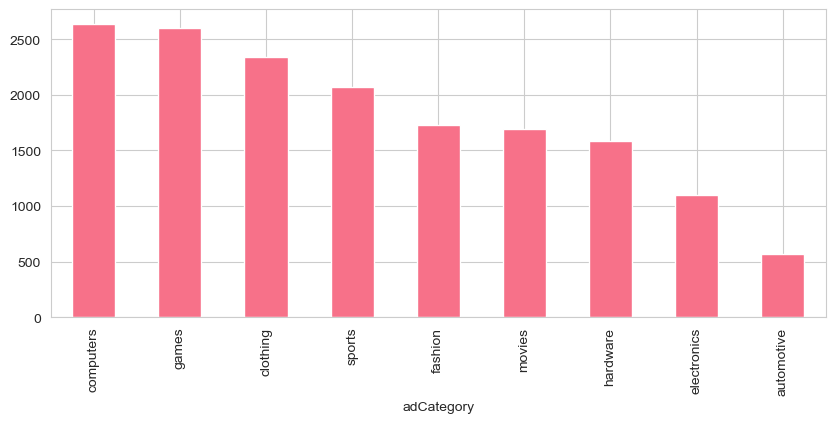

Computers and Games adverts were the most adverts targeted at the players


In [71]:
df.value_counts('adCategory').plot(kind='bar',figsize=(10,4))
plt.show()
print ("Computers and Games adverts were the most adverts targeted at the players")

## Team and User with the most targeted Ads

<Axes: xlabel='teamId'>

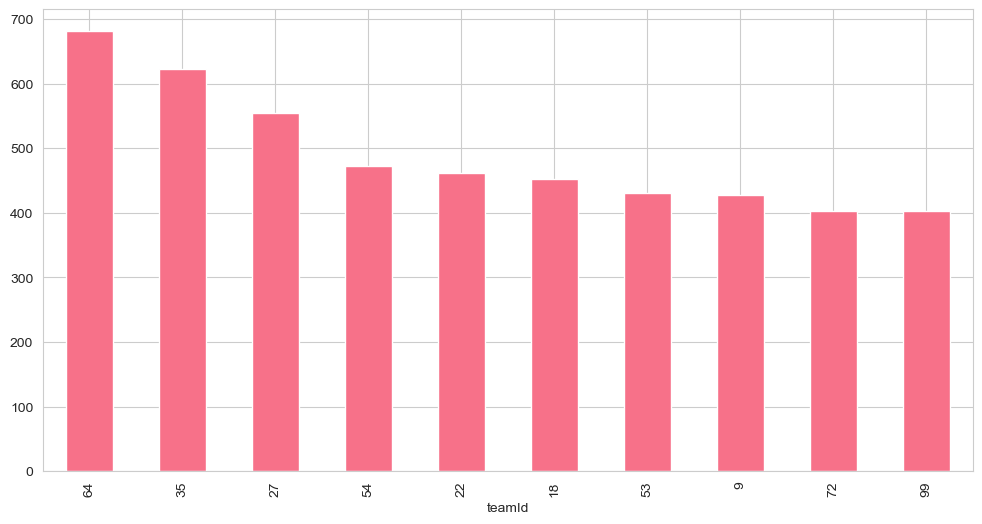

In [72]:
# Top 10 teams with the most ad targeted
df['teamId'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='userId'>

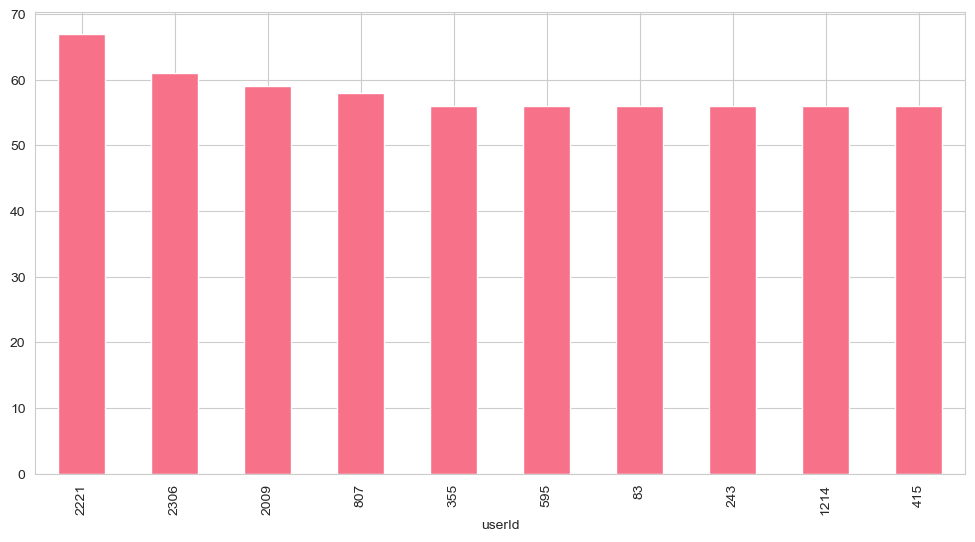

In [73]:
# Top 10 uers with the most ad targeted
df['userId'].value_counts().head(10).plot(kind='bar')

In [74]:
# Time Series Analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp']
df.set_index('timestamp', inplace=True)

<Axes: xlabel='timestamp'>

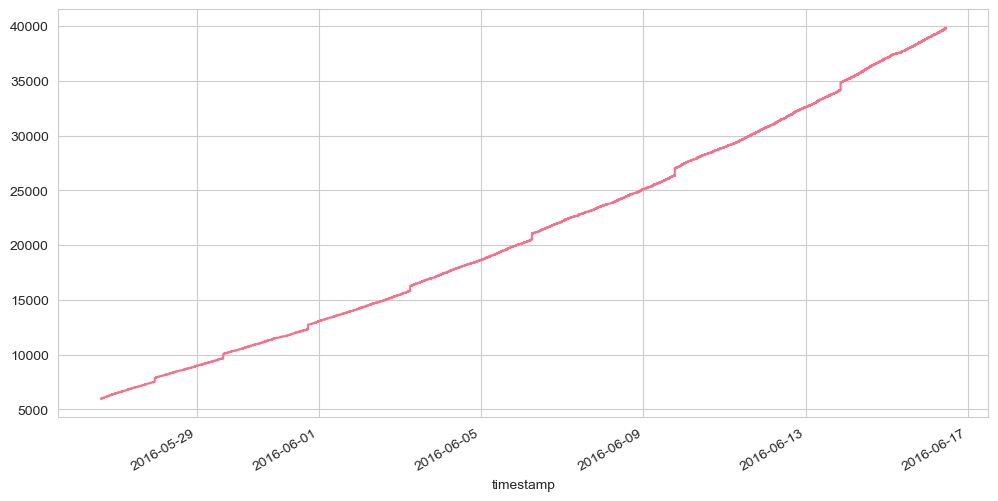

In [75]:
# Time series analysis to show ad session created over time on the platform.
df["txId"].plot(kind="line")

In [76]:
# analysis how often the top 5 team and user were targeted
# extracting the top 5 team
df['teamId'].value_counts().head(5)

teamId
64    681
35    623
27    554
54    473
22    462
Name: count, dtype: int64

In [77]:
# querying for teamId 64
df_64 = df.query('teamId == 64')
df_64.head()

txId  userSessionId  teamId  userId  adId   adCategory
timestamp                                                                  
2016-05-26 15:38:42  6000           5955      64    2009    17        games
2016-05-26 16:17:31  6035           5886      64      68     2  electronics
2016-05-26 16:28:50  6028           5886      64      68    21       movies
2016-05-26 18:11:05  6151           5946      64     846    12    computers
2016-05-26 18:30:14  6147           5893      64    1544     6       movies

<Axes: xlabel='timestamp'>

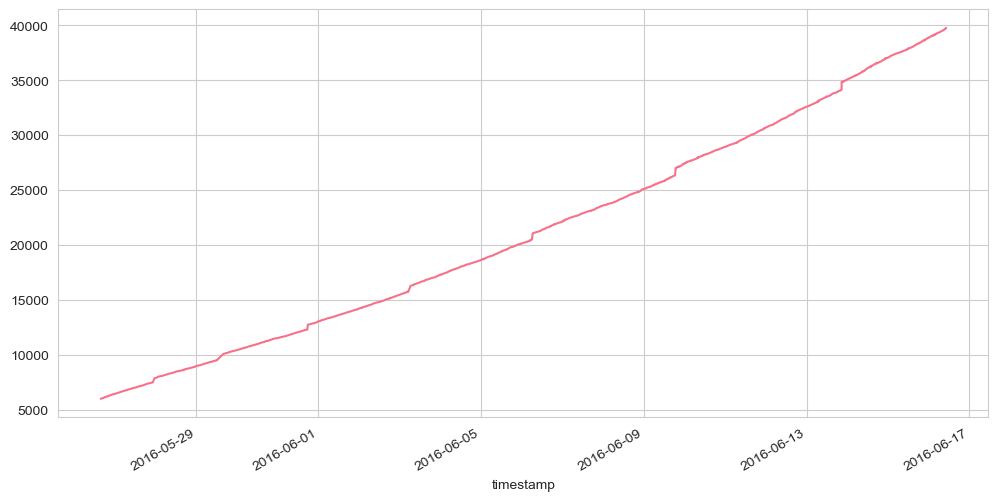

In [78]:
#Time series Analysis for team64
df_64["txId"].plot(kind="line")

By Mathematical induction, we can conclusively say the all teams were targeted the same way


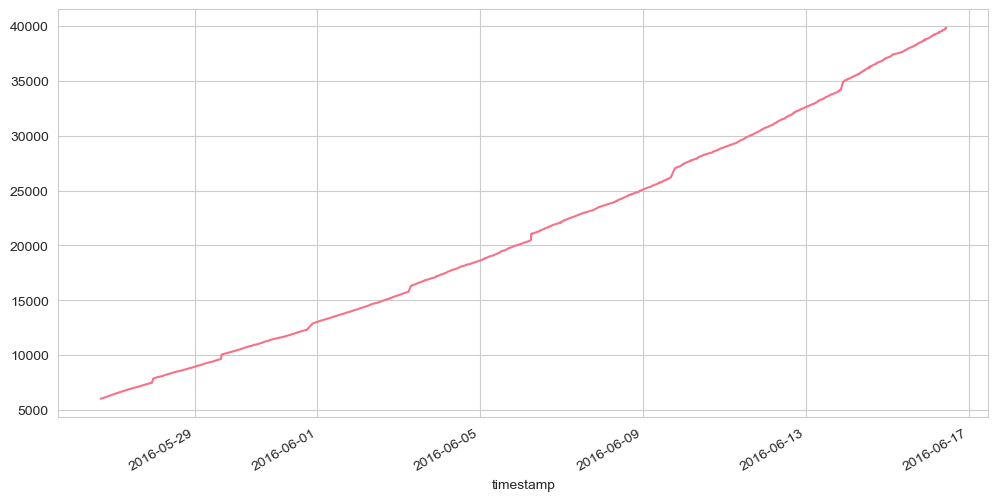

In [80]:
# querying for teamId 35
df_35 = df.query('teamId == 35')
df_35["txId"].plot(kind="line")

print ("By Mathematical induction, we can conclusively say the all teams were targeted the same way")

## Time Series using Plotly

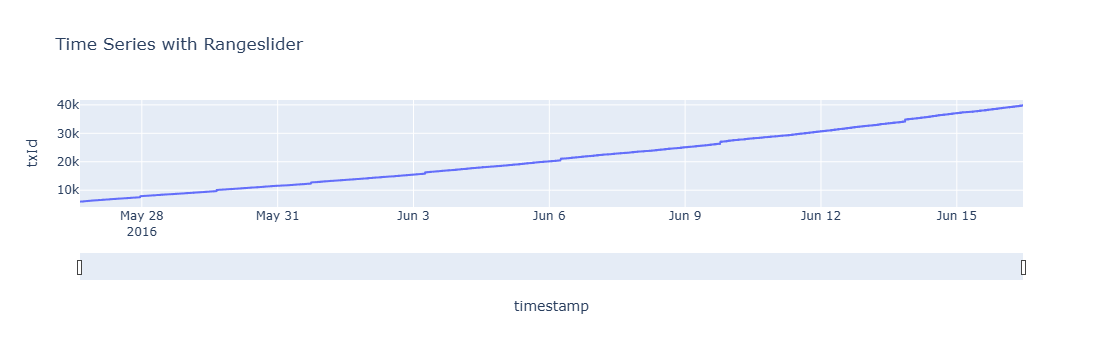

In [97]:
fig = px.line(df, x='timestamp', y='txId', title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True) ####### add range slider for time series data
fig.show()

## Data Visualisation for the In game purchase data

- Time series analysis if possible
- Team with the most in game purchase
- Spender analysis
- Spender by Team
- Frequent user purchase

In [191]:
df1.head()

df1["userId"].nunique()

546

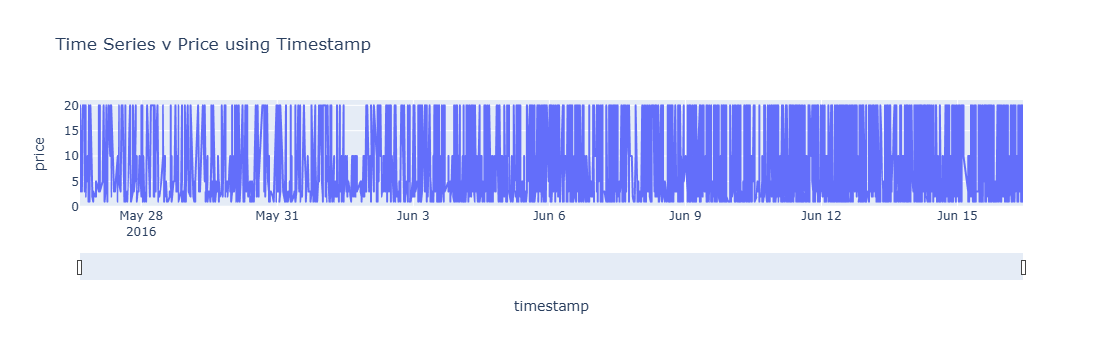

In [192]:
fig = px.line(df1, x='timestamp', y='price', title='Time Series v Price using Timestamp')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [186]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['date'] = df1['timestamp'].dt.normalize()

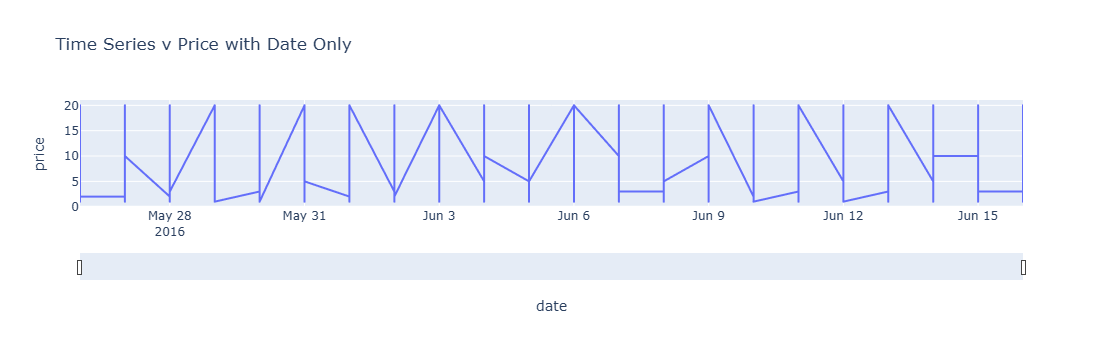

In [187]:
fig = px.line(df1, x='date', y='price', title='Time Series v Price with Date Only')
fig.update_xaxes(rangeslider_visible=True) 
fig.show()

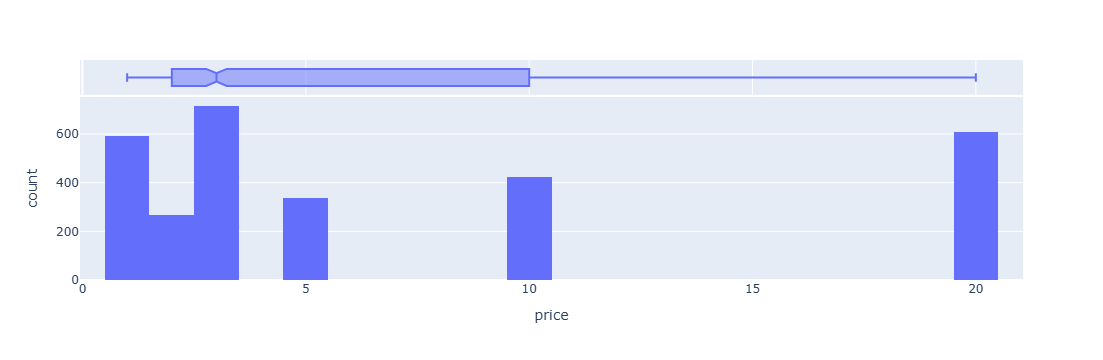

💡 Key Learning: The median in-game purchase on the platform is set at £3


In [105]:
# Using plotly chart to explore the in-game purchase distribution
fig = px.histogram(df1, x="price", marginal="box")
fig.show()

print("💡 Key Learning: The median in-game purchase on the platform is set at £3")

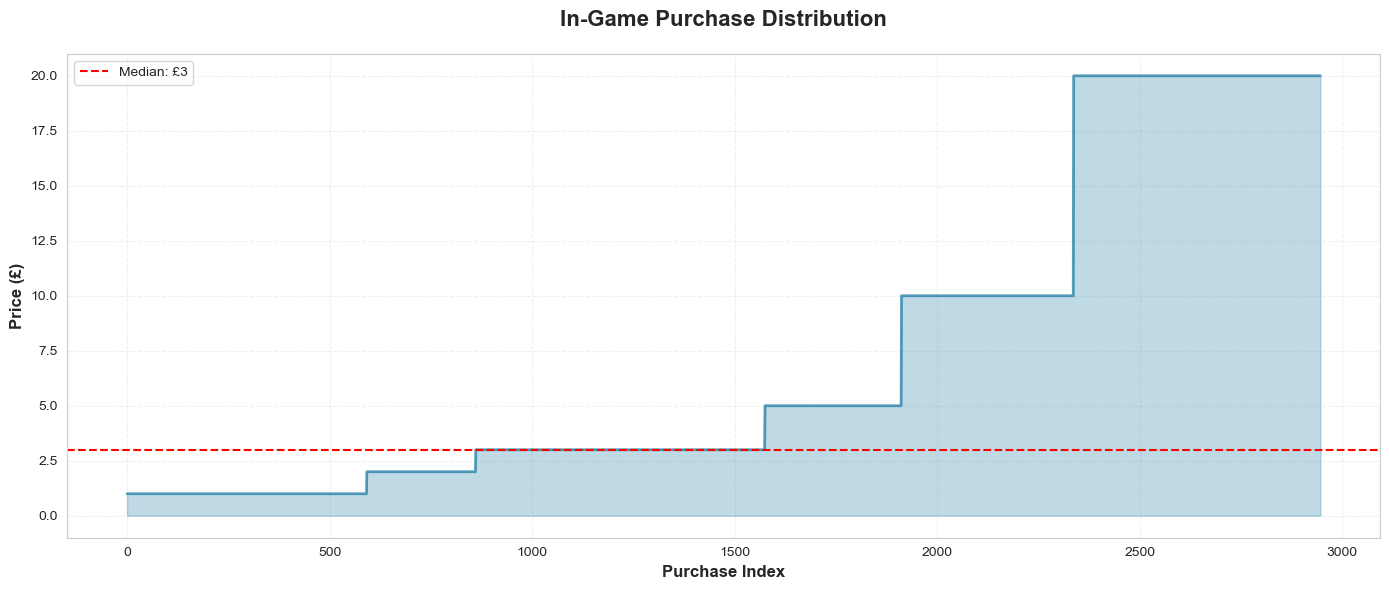

💡 Key Learning: The median in-game purchase on the platform is set at £3


In [101]:
fig, ax = plt.subplots(figsize=(14, 6))

# Sort by price for better line plot
price_sorted = df1.sort_values('price')
ax.plot(range(len(price_sorted)), price_sorted['price'], 
        linewidth=2, color='#2E86AB', alpha=0.8)

# Customisation
ax.set_xlabel('Purchase Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Price (£)', fontsize=12, fontweight='bold')
ax.set_title('In-Game Purchase Distribution', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.fill_between(range(len(price_sorted)), price_sorted['price'], alpha=0.3, color='#2E86AB')

# Add median line
median_price = df1['price'].median()
ax.axhline(y=median_price, color='red', linestyle='--', label=f'Median: £{median_price:,.0f}')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("💡 Key Learning: The median in-game purchase on the platform is set at £3")

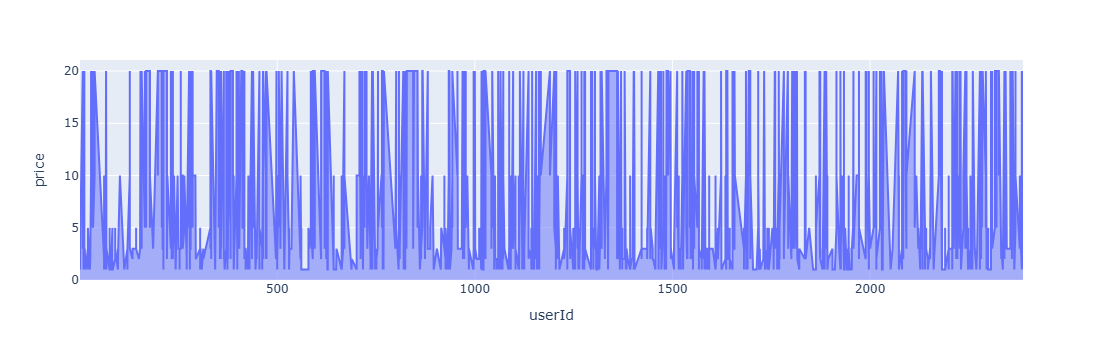

💡 Key Learning: Untidy in-game purchase distribution


In [106]:
fig = px.area(df1,x='userId',y='price')
fig.show()

print("💡 Key Learning: Untidy in-game purchase distribution")

💡 Key Learning: Better in-game purchase distribution using SEABORN


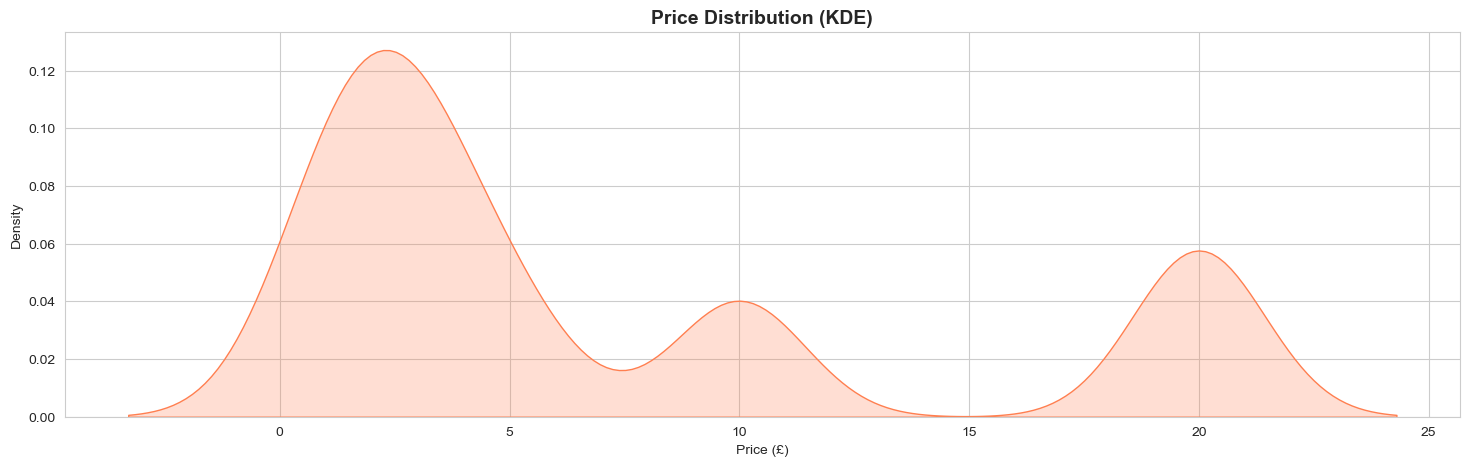

In [38]:
fig, ax = plt.subplots(figsize=(18, 5))

sns.kdeplot(data=df1, x='price', fill=True, color='coral')
ax.set_title('Price Distribution (KDE)', fontsize=14, fontweight='bold')
ax.set_xlabel('Price (£)')

print("💡 Key Learning: Better in-game purchase distribution using SEABORN")

In [124]:
# analysis how often the top 5 teams and 15 users with the most in-game purchase
# extracting the top 5 team
print("\n The top 5 team with the most frequent purchase in the game are:")
df1['team'].value_counts().head(5)
#print("\n The top 5 users with the most frequent purchase in the game are:")
#df1['userId'].value_counts().head(5)


 The top 5 team with the most frequent purchase in the game are:


team
27    101
64    100
9      98
35     94
54     89
Name: count, dtype: int64

In [123]:
print("\n The top 15 users with the most frequent purchase in the game are:")
df1['userId'].value_counts().head(15)


 The top 15 users with the most frequent purchase in the game are:


userId
1300    16
1143    15
2229    15
1022    15
1027    15
1260    14
221     14
1697    14
2248    14
355     13
643     13
12      13
1162    13
670     13
1892    13
Name: count, dtype: int64

## Analysis on the Team and Users with the most money spent on purchase in-game

In [137]:
Top_Team_Spender = (
    df1.groupby('team')['price']
      .sum()
      .reset_index()
      .rename(columns={'price': 'Total_Spent'})
      .sort_values('Total_Spent', ascending=False)
)

Top_Team_Spender.head(10)

team  Total_Spent
9     27        880.0
18    54        777.0
12    35        710.0
23    64        693.0
17    53        677.0
24    66        647.0
20    59        644.0
3     11        587.0
41    97        549.0
7     22        535.0

In [138]:
Top_User_Spender = (
    df1.groupby('userId')['price']
      .sum()
      .reset_index()
      .rename(columns={'price': 'Total_Spent'})
      .sort_values('Total_Spent', ascending=False)
)

Top_User_Spender.head(10)

userId  Total_Spent
504    2229        223.0
4        12        215.0
107     471        202.0
115     511        200.0
227    1027        189.0
141     670        183.0
282    1260        183.0
72      352        180.0
387    1697        172.0
395    1732        172.0

In [139]:
Avg_Team_Spender = (
    df1.groupby('team')['price']
      .mean()
      .reset_index()
      .rename(columns={'price': 'Avg_Total_Spent'})
      .sort_values('Avg_Total_Spent', ascending=False)
)

Avg_Team_Spender.head(10)

team  Avg_Total_Spent
56   115        14.300000
92   155        14.000000
64   123        12.777778
93   156        12.555556
1      8        11.937500
53   112        11.600000
61   120        11.466667
49   108        11.266667
21    61        11.187500
96   160        11.000000

In [143]:
Avg_User_Spender = (
    df1.groupby('userId')['price']
      .mean()
      .reset_index()
      .rename(columns={'price': 'Avg_Total_Spent'})
      .sort_values('Avg_Total_Spent', ascending=False)
)

Avg_User_Spender.head(10)

userId  Avg_Total_Spent
466    2035             20.0
16       67             20.0
339    1485             20.0
115     511             20.0
487    2154             20.0
469    2071             20.0
91      409             20.0
68      332             20.0
71      347             20.0
225    1024             20.0

<Axes: title={'center': 'Spender Analysis'}, xlabel='Spender Category', ylabel='Amount Spent'>

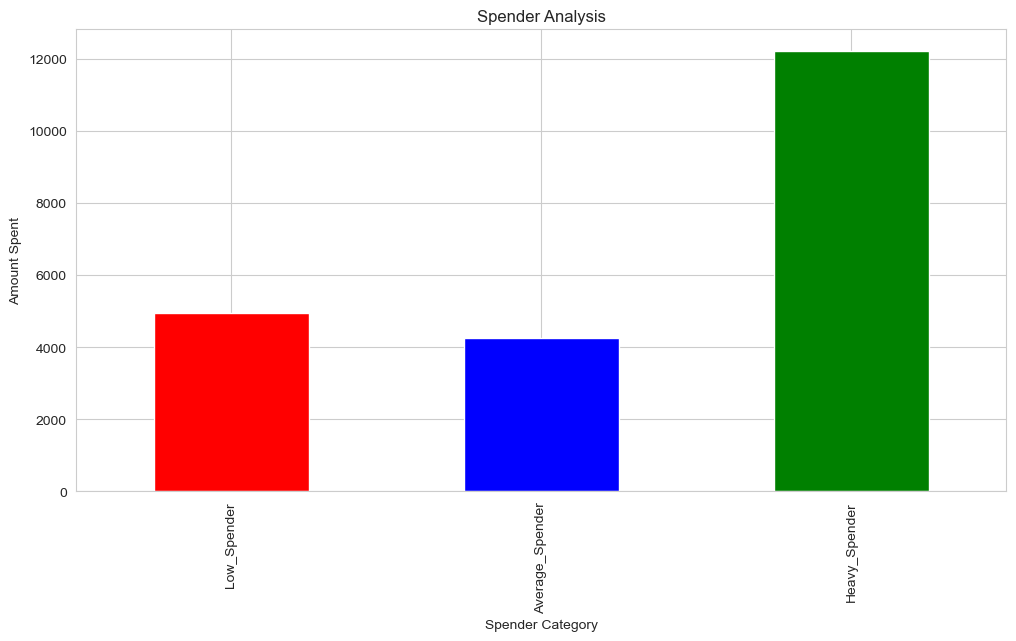

In [177]:
# visualisation of Spender category
df1_spender = df1.groupby('Spender')['price'].sum()
df1_spender.plot(kind='bar', color=['red', 'blue', 'green'], xlabel='Spender Category', ylabel='Amount Spent', title='Spender Analysis')

💡 Key Learning: The game has more Low Spenders, although the heavy spenders are generating more


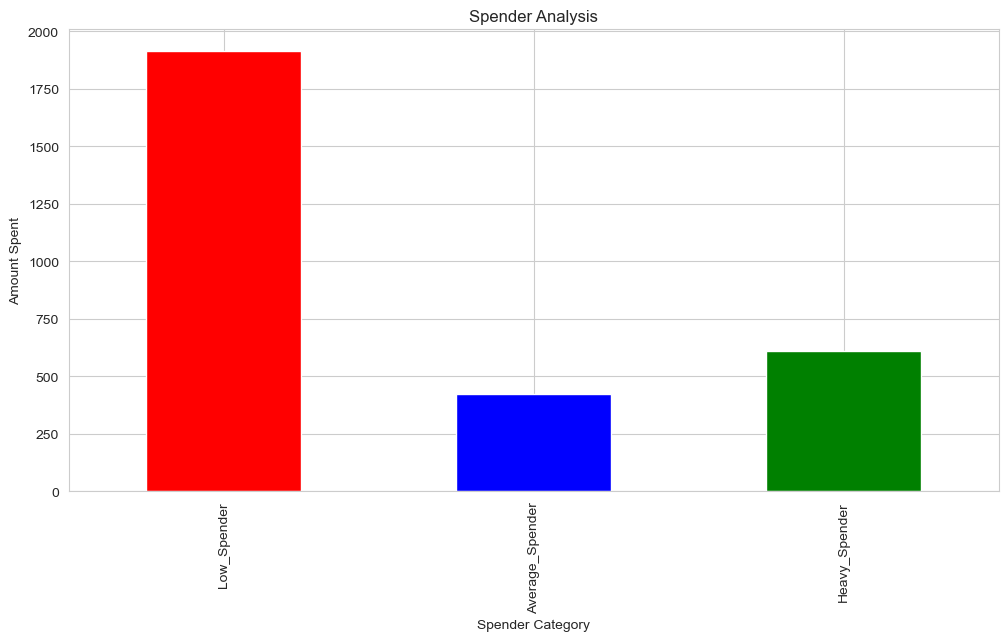

In [161]:
df1_count_spender = df1.groupby('Spender')['price'].count()
df1_count_spender.plot(kind='bar', color=['red', 'blue', 'green'], xlabel='Spender Category', ylabel='Amount Spent', title='Spender Analysis')


print("💡 Key Learning: The game has more Low Spenders, although the heavy spenders are generating more")

💡 Key Learning: The Low Spenders are spending £0.5 less than the game median spend and £4.7 less than the game average spend


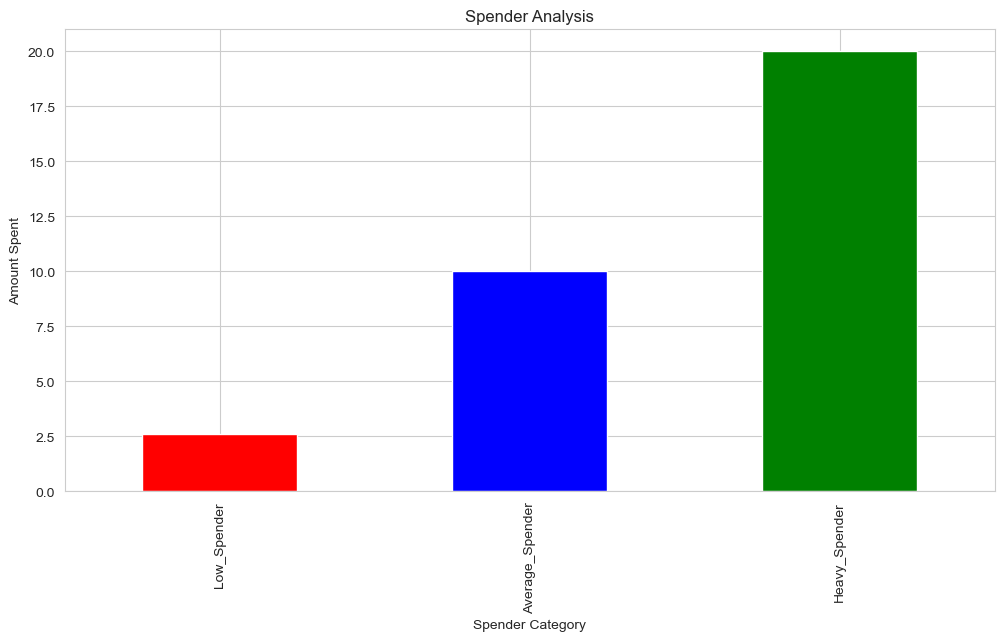

In [166]:
df1_avg_spender = df1.groupby('Spender')['price'].mean()
df1_avg_spender.plot(kind='bar', color=['red', 'blue', 'green'], xlabel='Spender Category', ylabel='Amount Spent', title='Spender Analysis')


print("💡 Key Learning: The Low Spenders are spending £0.5 less than the game median spend and £4.7 less than the game average spend")

## Spender Analysis based on Game Average Spend

In [167]:
df1['GameAvg'] = pd.cut(df1['price'], 
                               bins=[0, df1['price'].mean(), 20],
                               labels=['LessAvg','MoreAvg'])
df1.head()

timestamp  txId  userSessionId  team  userId  buyId  price  \
0  2016-05-26 15:36:54  6004           5820     9    1300      2    3.0   
1  2016-05-26 15:36:54  6005           5775    35     868      4   10.0   
2  2016-05-26 15:36:54  6006           5679    97     819      5   20.0   
3  2016-05-26 16:36:54  6067           5665    18     121      2    3.0   
4  2016-05-26 17:06:54  6093           5709    11    2222      5   20.0   

           Spender  GameAvg  
0      Low_Spender  LessAvg  
1  Average_Spender  MoreAvg  
2    Heavy_Spender  MoreAvg  
3      Low_Spender  LessAvg  
4    Heavy_Spender  MoreAvg

💡 Key Learning: The game has 1912 players spending less than the game's average spend as compared to the 1035 spending more than the game's average


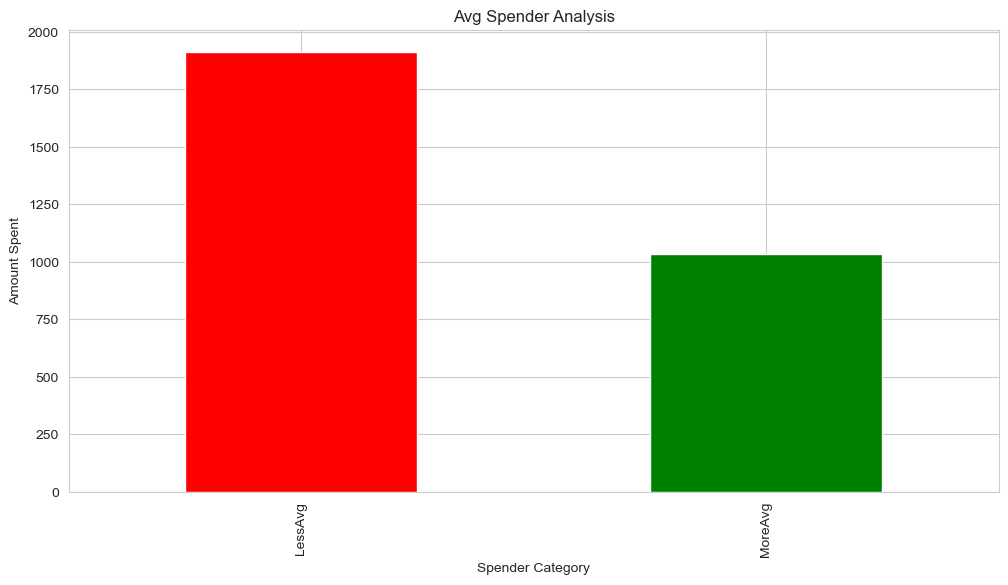

In [172]:
Avg_Spender = df1.groupby('GameAvg')['price'].count()
Avg_Spender.plot(kind='bar', color=['red', 'green'], xlabel='Spender Category', ylabel='Amount Spent', title='Avg Spender Analysis')

print("💡 Key Learning: The game has 1912 players spending less than the game's average spend as compared to the 1035 spending more than the game's average")

💡 Key Learning: The game generated £16,450 from players spending more than the game's average


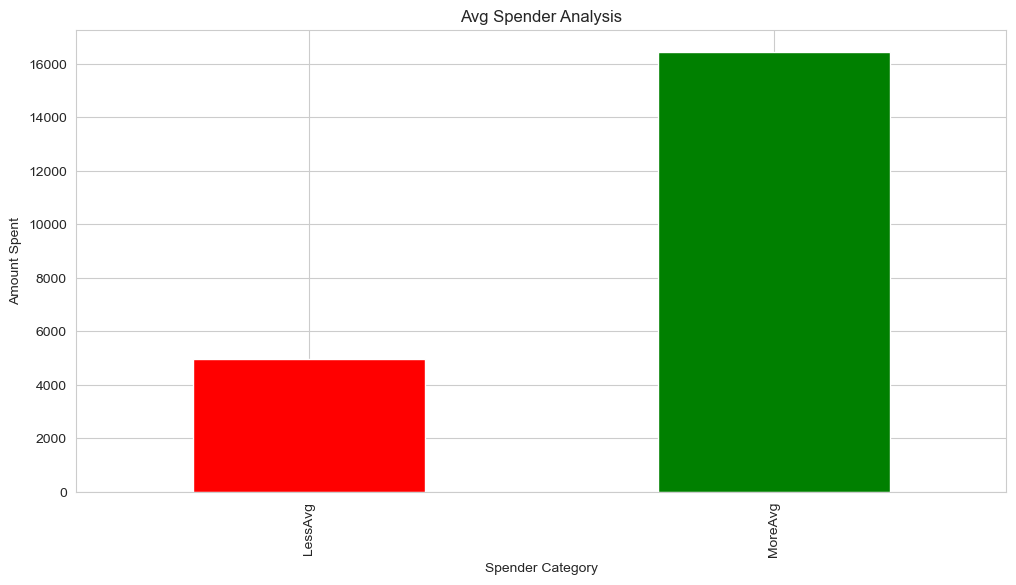

In [175]:
Avg_TSpender = df1.groupby('GameAvg')['price'].sum()
Avg_TSpender.plot(kind='bar', color=['red', 'green'], xlabel='Spender Category', ylabel='Amount Spent', title='Avg Spender Analysis')

print("💡 Key Learning: The game generated £16,450 from players spending more than the game's average")

<Axes: xlabel='GameAvg'>

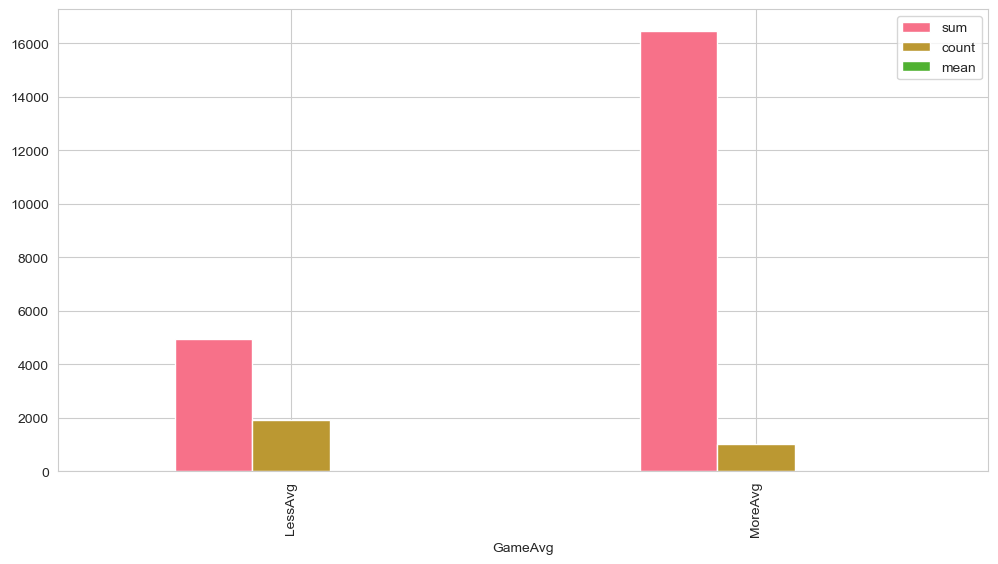

In [182]:
Comp =df1.groupby('GameAvg')['price'].agg(['sum', 'count', 'mean'])
Comp.plot(kind='bar')

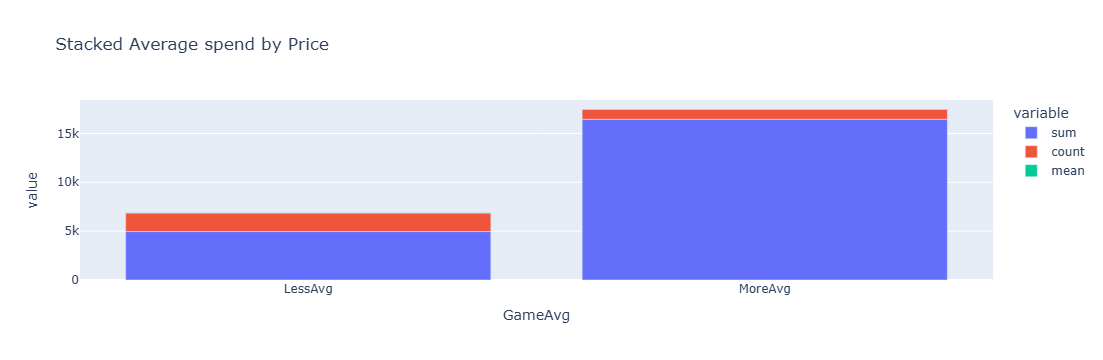

In [184]:
fig = px.bar(
    Comp,
    title="Stacked Average spend by Price"
)

fig.show()

## Advance Analysis with the Ad and In-game purchase data
## Joining the 2 datasets

In [190]:
df_merge = pd.merge(df, df1, on="userId")
df_merge.head(50)

timestamp_x  txId_x  userSessionId_x  teamId  userId  adId  \
0   2016-05-26 15:13:22    5974             5809      27     611     2   
1   2016-05-26 15:13:22    5974             5809      27     611     2   
2   2016-05-26 15:13:22    5974             5809      27     611     2   
3   2016-05-26 15:13:22    5974             5809      27     611     2   
4   2016-05-26 15:13:22    5974             5809      27     611     2   
5   2016-05-26 15:13:22    5974             5809      27     611     2   
6   2016-05-26 15:17:24    5976             5705      18    1874    21   
7   2016-05-26 15:17:24    5976             5705      18    1874    21   
8   2016-05-26 15:17:24    5976             5705      18    1874    21   
9   2016-05-26 15:17:24    5976             5705      18    1874    21   
10  2016-05-26 15:17:24    5976             5705      18    1874    21   
11  2016-05-26 15:17:24    5976             5705      18    1874    21   
12  2016-05-26 15:17:24    5976             5705      18    1874    21   
13  2016-05-26 15:17:24    5976             5705      18    1874    21   
14  2016-05-26 15:17:24    5976             5705      18    1874    21   
15  2016-05-26 15:22:52    5978             5791      53    2139    25   
16  2016-05-26 15:22:52    5978             5791      53    2139    25   
17  2016-05-26 15:22:52    5978             5791      53    2139    25   
18  2016-05-26 15:22:52    5978             5791      53    2139    25   
19  2016-05-26 15:22:52    5978             5791      53    2139    25   
20  2016-05-26 15:22:52    5978             5791      53    2139    25   
21  2016-05-26 15:22:57    5973             5756      63     212    10   
22  2016-05-26 15:22:57    5973             5756      63     212    10   
23  2016-05-26 15:22:57    5973             5756      63     212    10   
24  2016-05-26 15:22:57    5973             5756      63     212    10   
25  2016-05-26 15:22:57    5973             5756      63     212    10   
26  2016-05-26 15:22:57    5973             5756      63     212    10   
27  2016-05-26 15:22:57    5973             5756      63     212    10   
28  2016-05-26 15:22:57    5973             5756      63     212    10   
29  2016-05-26 15:22:58    5980             5920       9    1027    20   
30  2016-05-26 15:22:58    5980             5920       9    1027    20   
31  2016-05-26 15:22:58    5980             5920       9    1027    20   
32  2016-05-26 15:22:58    5980             5920       9    1027    20   
33  2016-05-26 15:22:58    5980             5920       9    1027    20   
34  2016-05-26 15:22:58    5980             5920       9    1027    20   
35  2016-05-26 15:22:58    5980             5920       9    1027    20   
36  2016-05-26 15:22:58    5980             5920       9    1027    20   
37  2016-05-26 15:22:58    5980             5920       9    1027    20   
38  2016-05-26 15:22:58    5980             5920       9    1027    20   
39  2016-05-26 15:22:58    5980             5920       9    1027    20   
40  2016-05-26 15:22:58    5980             5920       9    1027    20   
41  2016-05-26 15:22:58    5980             5920       9    1027    20   
42  2016-05-26 15:22:58    5980             5920       9    1027    20   
43  2016-05-26 15:22:58    5980             5920       9    1027    20   
44  2016-05-26 15:27:19    5977             5954      77     595     4   
45  2016-05-26 15:27:19    5977             5954      77     595     4   
46  2016-05-26 15:27:19    5977             5954      77     595     4   
47  2016-05-26 15:27:19    5977             5954      77     595     4   
48  2016-05-26 15:28:51    5981             5674      54     770     6   
49  2016-05-26 15:28:51    5981             5674      54     770     6   

     adCategory         timestamp_y  txId_y  userSessionId_y  team  buyId  \
0   electronics 2016-05-30 13:06:54   11058             9769    27      1   
1   electronics 2016-06-03 18:36:54   17005            15910    27      4   
2   el

In [193]:
df_merge["userId"].nunique()

543

In [ ]:
df_merge.drop(['timestamp_x', 'txId_x','userSessionId_x','timestamp_y', 'txId_y','userSessionId_y'], axis=1, inplace=True)

In [196]:
df_merge.head()

teamId  userId  adId   adCategory  team  buyId  price          Spender  \
0      27     611     2  electronics    27      1    2.0      Low_Spender   
1      27     611     2  electronics    27      4   10.0  Average_Spender   
2      27     611     2  electronics    27      5   20.0    Heavy_Spender   
3      27     611     2  electronics    27      4   10.0  Average_Spender   
4      27     611     2  electronics    27      4   10.0  Average_Spender   

   GameAvg       date  
0  LessAvg 2016-05-30  
1  MoreAvg 2016-06-03  
2  MoreAvg 2016-06-07  
3  MoreAvg 2016-06-11  
4  MoreAvg 2016-06-13

In [197]:
user_analysis = df_merge.groupby('userId')['GameAvg'].count()
user_analysis.head(5)
#user_analysis.plot(kind='bar', color=['red', 'blue', 'green'], xlabel='Spender Category', ylabel='Amount Spent', title='Spender Analysis')

userId
1     396
8      50
9     222
10    190
12    598
Name: GameAvg, dtype: int64

## User Dataset
- Age demography of player
- popularity by country

In [9]:
df2.head()

timestamp  userId         nick country  birth_year birth_month
0  2012-06-19 14:53:41     442     pcjIOBKW      BA        1994        July
1  2012-06-19 19:29:01     949      vAOfUkf      HU        1971       April
2  2012-06-20 19:34:59    1654       qOOXSQ      IS        1970       April
3  2012-06-21 01:18:29    1586      px4gW51      AM        1965    November
4  2012-06-21 15:35:00     599  9gkfwRC73Uc      CC        1994      August

In [10]:
df2['birth_year'].describe()

count    2393.000000
mean     1976.222315
std        14.068480
min      1946.000000
25%      1965.000000
50%      1978.000000
75%      1988.000000
max      1998.000000
Name: birth_year, dtype: float64

In [12]:
df2['Demography'] = pd.cut(df2['birth_year'], 
                               bins=[0, 1964, 1979, 1994, 2012],
                               labels=['Baby Boomers','Gen X', 'Millenials', 'Gen Z'])
df2.head()

timestamp  userId         nick country  birth_year birth_month  \
0  2012-06-19 14:53:41     442     pcjIOBKW      BA        1994        July   
1  2012-06-19 19:29:01     949      vAOfUkf      HU        1971       April   
2  2012-06-20 19:34:59    1654       qOOXSQ      IS        1970       April   
3  2012-06-21 01:18:29    1586      px4gW51      AM        1965    November   
4  2012-06-21 15:35:00     599  9gkfwRC73Uc      CC        1994      August   

   Demography  
0  Millenials  
1       Gen X  
2       Gen X  
3       Gen X  
4  Millenials

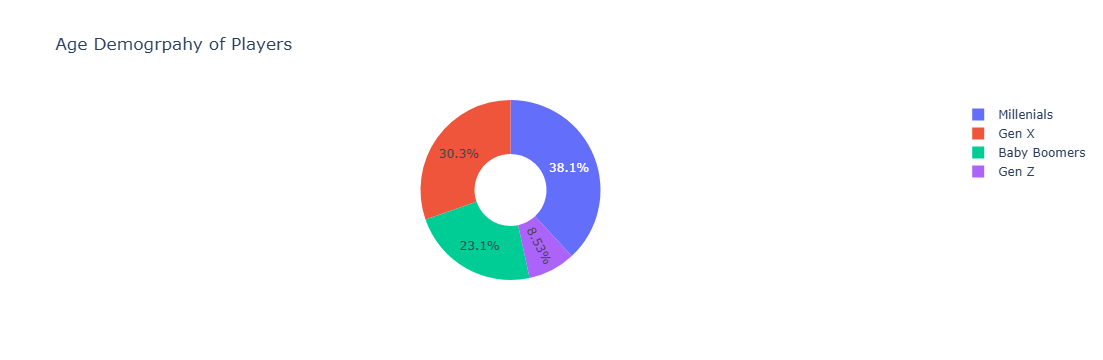

In [16]:
fig = px.pie(
    data_frame=df2,
    values='birth_year',
    names='Demography',
    title='Age Demogrpahy of Players',
    hole = 0.4,
    color='Demography'
)
fig.show()

In [19]:
df2['Demography'].value_counts()

Demography
Millenials      906
Gen X           727
Baby Boomers    558
Gen Z           202
Name: count, dtype: int64

In [24]:
# Top 10 player countries
df2['country'].value_counts().head(10)

country
BA    10
HU    10
IS    10
AM    10
CC    10
MH    10
SM    10
BZ    10
PF    10
JO    10
Name: count, dtype: int64

<Axes: xlabel='country'>

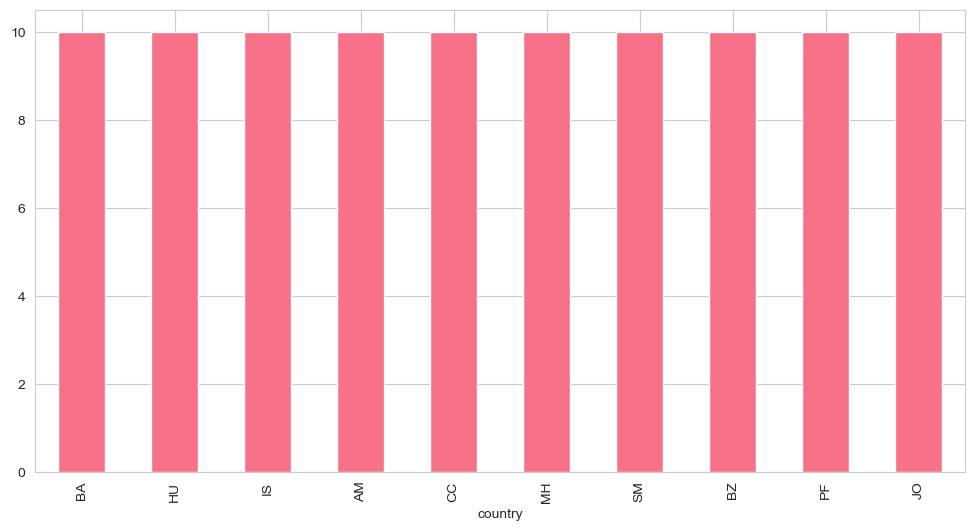

In [25]:
df2['country'].value_counts().head(10).plot(kind='bar')

In [26]:
df2["country"].nunique()

240

<Axes: title={'center': 'Players Birth Month'}, xlabel='birth_month'>

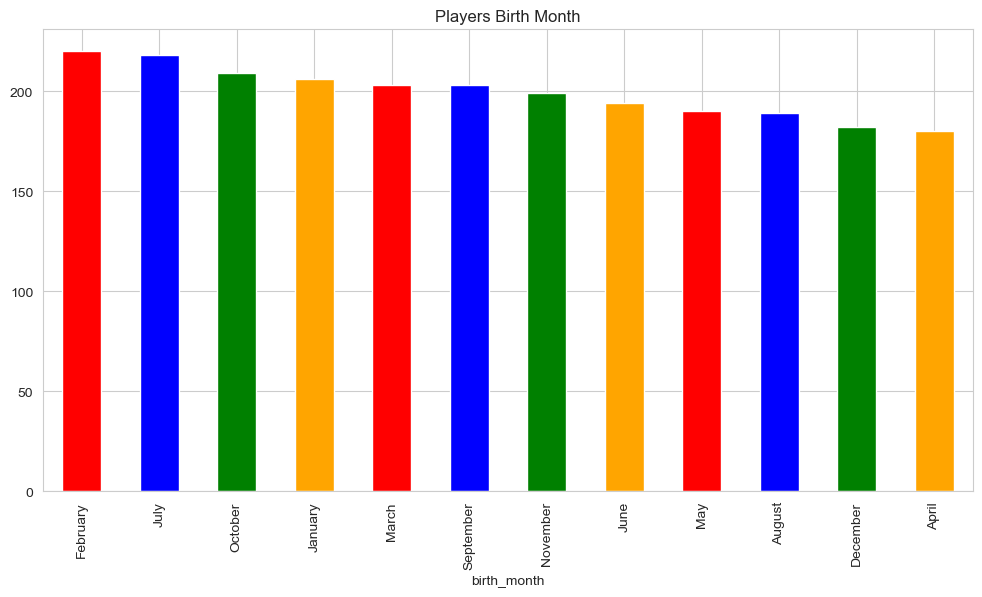

In [31]:
df2['birth_month'].value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'orange'], title='Players Birth Month')
